<a href="https://colab.research.google.com/github/alceu-castanheira/2-Imersao-Dados-Alura/blob/main/2_Imersao_Dados_Alura_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2ª Imersão de Dados Alura - Desafio**

* Olá! Eu me chamo Alceu Bernardes Castanheira de Farias e este notebook corresponde à minha entrada na competição da 2ª Imersão de Dados da Alura, realizada entre o período de 18/10 - 23/10.

* O objetivo é realizar uma análise nos dados dos alunos inscritos no ENEM 2019 que são do Distrito Federal, analisando diferentes fatores que possam ter relação com a nota obtida pelo aluno no ENEM.

* Assim, o objetivo é **encontrar relações nesses dados para poder entender melhor o cenário da educação no Distrito Federal**.

* Os dados utilizados aqui são disponibilizados pelo INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira) e foram separados pela equipe da Alura juntamente com Antônio Salvador Neto Fonte, que separou os dados por estado e disponibilizou em: https://www.kaggle.com/dataset/eeebf2b4e3352e5ae3bbc7f985dd1edd7e11904a687431737859b3bd8f93cc64?select=Selec_AC.txt

* Caso você tenha interesse em realizar análises com esses dados para outro estado, basta seguir o tutorial disponibilizado pela Alura em: https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/README.md

* Por fim, este é o link do meu repositório do Github, com os notebooks que foram desenvolvidos nas aulas da 2ª edição da Imersão de Dados da Alura: https://github.com/alceu-castanheira/2-Imersao-Dados-Alura

* Ainda sou iniciante na área de Data Science e tenho muito a melhorar, mas espero que este notebook (e os demais presentes no repositório desenvolvidas durante a Imersão) possa ser útil para auxiliar nos seus estudos na área de Data Science. 

## **1) Importando os dados para o nosso notebook**

* Para importar os dados e realizar análises nos mesmos iremos utilizar uma biblioteca muito comum na área de Data Science quando trabalhamos com Python: o Pandas. 

* A documentação oficial do Pandas pode ser encontrada em: https://pandas.pydata.org/docs/

In [1]:
# Importando a biblioteca do Pandas para o nosso notebook
#
import pandas as pd

# Vamos utilizar o tutorial disponível em https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/README.md
# para acessar os dados separados do Distrito Federal. Para isso selecionamos a Unidade da Federação pela variável
# estado = "df" e seguimos as instruções abaixo:
#
estado = "df"
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2020-10-25 15:58:02--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/df.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/df.csv.zip [following]
--2020-10-25 15:58:03--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/df.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/df.csv.zip [following]
--2020-10-25 15:58:03--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/df.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [2]:
# Com isso, temos em arquivo o link direto para importar os dados dos alunos inscritos no ENEM em 2019 que são do DF.
# As colunas são separadas por ';', por isso utilizamos o parâmetro sep=';' para indicar isso para a função que lê
# o arquivo (pd.read_csv()). Salvamos os dados em um Dataframe chamado dados_df
#
dados_df = pd.read_csv(arquivo, sep=';')

# Verificamos se os dados foram importados corretamente com a função head(), que retorna um número de linhas do Dataframe
# em questão (por padrão, retorna as 5 primeiras linhas do Dataframe)
#
dados_df.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,4791,190001009418,2019,5300108,Brasília,53,DF,20,M,1,1,1,1506138.0,Redenção,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CBCCADEBCEEBECABDCBAEDBDCDBBAAEABBEBBEBAECAAC,BCDDA99999CBDAEEECCCBBE*DEDCBCADEBAABDAAECBCCA...,BCCADEBBABCBADAACEDBDEACBABECEDBEACCECBBAEEAD,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,140.0,160.0,140.0,700.0,D,E,C,D,2,G,B,C,D,B,A,B,B,B,A,B,A,A,C,A,A,C,A,B,B
1,36545,190001041173,2019,5300108,Brasília,53,DF,17,F,1,3,1,1302603.0,Manaus,13.0,AM,2,0,2,1.0,0,53000986.0,5300108.0,Brasília,53.0,DF,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,EEBCAEDBADBEABABEBABCCAACDBBEBCCCACBAECBBEABB,EDBCE99999ABBCBDDAAEADDDEAADDCDBBCDCDECEBAECBD...,ECEADDABABCBADEBCEBBDECECEBBCEDCBCACBAABDBCAC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,120.0,140.0,180.0,120.0,720.0,G,G,D,D,2,I,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,A,B
2,118819,190001123448,2019,5300108,Brasília,53,DF,22,F,1,3,1,2205805.0,Luzilândia,22.0,PI,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CEAACEBABABDAAACEDAECABACDEEEBAABAECDAAEEBDEE,99999BAABEABECABEAAECADAADACBCBBABACEEBEEAEECA...,DDDEBBBBCEBBABECADEDECCCCACAAABCEEDADEBCAEDDE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,160.0,120.0,160.0,100.0,660.0,F,E,D,B,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B
3,123789,190001128418,2019,5300108,Brasília,53,DF,21,F,1,3,1,3529401.0,Mauá,35.0,SP,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,A,C,3,B,A,B,C,A,A,B,B,A,A,A,A,A,B,B,B,C,A,A,B
4,127961,190001132590,2019,5300108,Brasília,53,DF,19,F,1,3,1,5300108.0,Brasília,53.0,DF,2,0,2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,F,F,4,D,C,C,C,B,A,B,A,B,A,B,A,A,C,B,A,C,B,B,B


## **2) Análise Inicial dos Dados**

In [3]:
# Verificamos que os dados foram importados adequadamente. Agora, podemos verificar quantos dados temos disponíveis no
# nosso Dataframe, exibindo as informações retornadas pela função shape(): número de linhas e colunas do dataframe
#
print('O número de alunos do DF inscritos no ENEM no nosso conjunto de dados é : {}.'.format(dados_df.shape[0]))
print('Para cada aluno no nosso conjunto de dados há disponível {} informações.'.format(dados_df.shape[1]))

O número de alunos do DF inscritos no ENEM no nosso conjunto de dados é : 94352.
Para cada aluno no nosso conjunto de dados há disponível 137 informações.


* Portanto, temos dados de **94352 inscritos do DF no ENEM** para análise. 

* Segundo o Senso Escolar de 2019 disponibilizado pela Secretaria de Educação do Distrito Federal [1], tinhamos um total de **125000 alunos matriculados no Ensino Médio ou em algum programa de Educação para Jovens e Adultos em 2019.**

* Essa seria, a princípio, a quantidade de alunos que seriam o público alvo do ENEM. Temos uma quantidade menor de inscritos do que 125000, como vimos anteriormente, mas é razoável assumir que essa quantidade de dados seja suficiente para investigar algumas das características do Ensino no Distrito Federal.

* Além disso, não são todos os jovens e adultos que estão inscritos nesses programas educacionais que prestam ENEM. 

* Cada aluno possui 137 informações atreladas a ele, que correspondem a dados pessoais, dados da escola em que ele estuda, as notas obtidas no ENEM e respostas ao questionário do INEP, que envolvem questões relacionadas à renda familiar e as condições tem no lar.

### **2.1) Análise da distribuição do sexo dos inscritos**

* Primeiramente, vamos analisar informações relacionadas ao inscritos do DF no ENEM 2019, sem levar em consideração as notas obtidas por eles nas provas.
* O objetivo é analisar como é formado nosso conjunto de dados.
* A primeira característica que vamos analisar é o sexo dos inscritos

In [4]:
# Para isso, analisamos a coluna 'TP_SEXO' do Dataframe, e com a função value_counts()
# obtemos a distribuição de frequência de cada sexo no nosso conjunto de dados
# 
dados_df['TP_SEXO'].value_counts()

F    55691
M    38661
Name: TP_SEXO, dtype: int64

In [5]:
# Podemos obter a mesma informação em termos percentuais utilizando o parâmetro normalize=True
# (a operação de normalização faz com que os valores sejam representados em intervalos de 0 a 1),
# multiplicados por 100
#
dados_df['TP_SEXO'].value_counts(normalize=True)*100

F    59.024716
M    40.975284
Name: TP_SEXO, dtype: float64

* Segundo a Codeplan (Companhia de Planejamento) do Distrito Federal, a população do Distrito Federal era composta por 52.2% de mulheres [2].
* Apesar de não ser na mesma proporção, temos que nosso conjunto de dados mantem a mesma tendência: **o número de inscritos do sexo feminino é maior que o número de inscritos do sexo masculino.**

<Figure size 864x864 with 0 Axes>

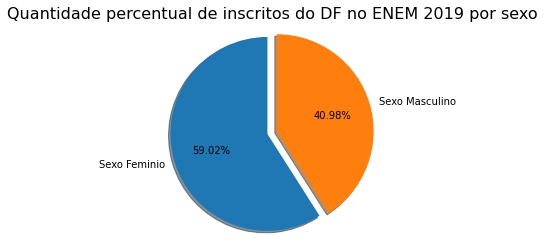

In [6]:
# Podemos visualizar isso por meio de um gráfico de pizza, por exemplo. 
# Esses gráficos não são tão indicados no caso de muitas classes diferentes, pela
# dificuldade de visualizar a diferença percentual da quantidade dessas classes 
# por meio da área do gráfico, mas no caso da separação simples que temos aqui entre
# sexo masculino e sexo feminino, o gráfico é suficiente
#
# Importando a biblioteca matplotlib.pyplot para construir gráficos e ajustar parâmetros
# das figuras, como tamanho, título e fonte.
#
import matplotlib.pyplot as plt

# Usando a função plt.pie() para construir o gráfico de pizza com as informações
# de sexo dos inscritos (dados_df['TP_SEXO'])
#
# Definindo o tamanho da figura 
#
plt.figure(figsize=(12,12))

# Labels do gráfico, ordenados no sentido anti-horário:
#
labels = 'Sexo Feminio', 'Sexo Masculino'

# Quantitaivo de cada label (resultado da operação dados_df['TP_SEXO'].value_counts())
#
sizes = [55691, 38661]

# Explodir a segunda fatia do gráfico, para criar um pequeno 3D
#
explode = (0, 0.1)  

# Configurando os parâmetros da função
#
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

# Proporção do gráfico como 'equal' garante que o gráfico seja desenhado como um círculo
#
ax1.axis('equal')

# Adicionando título ao gráfico
#
plt.title('Quantidade percentual de inscritos do DF no ENEM 2019 por sexo', fontsize=16)

# Exibindo o gráfico
#
plt.show()

* O gráfico contribui para exibir visualmente a informação que tinhamos anteriormente: a proporção em porcentagem de inscritos do DF no ENEM 2019 por sexo. 

* **Temos um percentual maior de inscritos do sexo feminino (59.02%) do que o percentual de inscritos do sexo masculino (40.98%).**

* Para esse tipo de análise, o gráfico de pizza é suficiente. Quando formos analisar categorias com mais classes e atributos, utilizaremos outros tipos de gráficos para disponibilizar as informações da melhor maneira possível.

### **2.2) Análise da distribuição de idade dos inscritos**

* Agora que analisamos a distribuição dos incritos por idade, podemos utilizar outros dados do nosso conjunto de dados, como a idade dos inscritos.

In [7]:
# Vamos mais uma vez recorrer à função value_counts() para analisar a distribuição de frequência na coluna 'NU_IDADE'
#
dados_df['NU_IDADE'].value_counts()

18    15618
17    13248
19    10856
20     7838
21     5806
      ...  
6         1
75        1
12        1
76        1
77        1
Name: NU_IDADE, Length: 68, dtype: int64

* Temos muitos valores distintos de idades presentes no conjunto de dados para observar todos diretamente com value_counts().

* Entretanto, **podemos observar que a maior parte dos inscritos tem 18 anos, seguido por 17, 19, 20 e 21 anos.** 

* Isso é esperado, uma vez que essa é a idade em que a maioria dos alunos termina ou já terminou o ensino médio, se inscrevendo no ENEM para concorrer às vagas em universidades por meio do ENEM.

* Ainda é possível perceber que temos inscritos no ENEM com 76 e 77 anos, o que é bastante curioso.

In [8]:
# Podemos verificar algumas estatísticas descritivas sobre a idade dos inscritos por meio da função describe()
#
dados_df['NU_IDADE'].describe()

count    94352.000000
mean        23.074201
std          8.321788
min          6.000000
25%         18.000000
50%         20.000000
75%         25.000000
max         77.000000
Name: NU_IDADE, dtype: float64

* A função describe() nos traz algumas informações interessantes:

1) **A média de idade dos inscritos é de aproximadamente 23 anos.** 

2) Considerando que temos muitos valores de idade no conjunto de dados, isso faz sentido: já vimos que a maioria dos inscritos tem 18, 17 ou 19 anos e isso traz a média para um valor mais próximo dessas idades.

3) O valor **mínimo encontrado foi de 6 anos.** Isso é muito curioso, pois trata-se de uma idade muito baixa para realizar uma prova. Obviamente esse aluno não pode concorrer a vagas em universidades, por exemplo, mas é provável que seja um aluno que esteja treinando para futuras edições do ENEM, quando ele tiver idade para disputar as vagas.

4) A **mediana da idade dos inscritos é de 20 anos**. 

5) Isso significa que se ordenarmos todas as idades em ordem crescente, o valor que divide esse conjunto em duas metades iguais é 20.

6) Da mesma forma, o valor que **divide esse conjunto em 25% dos valores à direita e 75% à esquerda é 18.**

7) De forma análoga, o valor que **divide esse conjunto em 75% dos valores à direita e 25% à esquerda é 25.**

6) Os dados que 1º e 3º quartis (25% e 75%) mostram que os dados estão concentrados nas idades mais jovens, como era esperado.

7) Por fim, o valor **máximo de idade encontrado foi de 77 anos.**

In [9]:
# Podemos verificar com a função unique() todos os diferentes valores de idade encontrados na coluna 'NU_IDADE'
#
dados_df['NU_IDADE'].unique()

array([20, 17, 22, 21, 19, 33, 31, 24, 25, 18, 53, 29, 26, 30, 16, 39, 50,
       34, 35, 27, 32, 51, 38, 42, 47, 57, 23, 28, 40, 44, 41, 37, 58, 45,
       36, 48, 55, 54, 49, 15, 43, 68, 46, 61, 52, 14, 65, 56, 59, 60, 73,
       69, 63, 77, 72, 75, 74, 66, 64, 62, 13, 70, 67, 76, 71, 12,  8,  6])

* Assim, podemos perceber que temos uma gama de inscritos com idades bem variadas.

* Para melhorar a visualização dos resultados em gráficos, podemos dividir as idades em faixas etárias.

In [10]:
# Primeiramente, vamos separar as colunas 'NU_IDADE' e 'TP_SEXO' do dataframe dados_df e salvar em 
# novo dataframe, entitulado faixa_etaria_df
#
faixa_etaria_df = dados_df[['NU_IDADE', 'TP_SEXO']]

# Verificando o dataframe faixa_etaria_df
#
faixa_etaria_df.head()

,NU_IDADE,TP_SEXO
0,20,M
1,17,F
2,22,F
3,21,F
4,19,F


In [11]:
# Vamos agrupar as idades em faixas etárias utilizando a função pd.cut() para gerar diferentes grupos,
# e vamos salvar esses dados em uma nova coluna do Dataframe dados_df chamada 'NU_FAIXA_ETARIA'
#
# Vamos importar a biblioteca Numpy para realizar operações numéricas nos nossos dados
#
import numpy as np

# Separando as idades por faixa etária e salvando na coluna 'NU_FAIXA_ETARIA' em 15 faixas etárias distintas
#
faixa_etaria_df['NU_FAIXA_ETARIA'] = pd.cut(dados_df['NU_IDADE'], bins = np.linspace(6, 77, num=15))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
# Uma vez que os dados estão salvos na nova coluna, podemos ordenar os valores por faixa etária 
# de maneira crescente com a função sort_values()
#
faixa_etaria_df = faixa_etaria_df.sort_values(by='NU_FAIXA_ETARIA')

# Vamos eliminar as linhas nas quais não foram informada a idade dos inscritos com a função dropna()
#
faixa_etaria_df = faixa_etaria_df.dropna()

# Verificando o dataframe faixa_etaria_df
#
faixa_etaria_df.head()

,NU_IDADE,TP_SEXO,NU_FAIXA_ETARIA
74084,8,M,"(6.0, 11.071]"
36342,16,F,"(11.071, 16.143]"
77100,16,F,"(11.071, 16.143]"
47010,16,M,"(11.071, 16.143]"
77105,16,F,"(11.071, 16.143]"


In [13]:
# Agora podemos retormar a análise da distribuiçãod e frequência dos inscritos no ENEM
# levando em conta a faixa etária dos mesmos com a função value_counts()
#
faixa_etaria_df['NU_FAIXA_ETARIA'].value_counts()

(16.143, 21.214]    53366
(21.214, 26.286]    15656
(26.286, 31.357]     7054
(11.071, 16.143]     5329
(31.357, 36.429]     4560
(36.429, 41.5]       3380
(41.5, 46.571]       2303
(46.571, 51.643]     1431
(51.643, 56.714]      783
(56.714, 61.786]      313
(61.786, 66.857]      108
(66.857, 71.929]       49
(71.929, 77.0]         18
(6.0, 11.071]           1
Name: NU_FAIXA_ETARIA, dtype: int64

In [14]:
# Podemos novamente exibir essa informação de forma percentual com o parâmetro normalize=True
# e multiplicando o resultado por 100
#
faixa_etaria_df['NU_FAIXA_ETARIA'].value_counts(normalize=True)*100

(16.143, 21.214]    56.561139
(21.214, 26.286]    16.593359
(26.286, 31.357]     7.476338
(11.071, 16.143]     5.648059
(31.357, 36.429]     4.833017
(36.429, 41.5]       3.582368
(41.5, 46.571]       2.440886
(46.571, 51.643]     1.516677
(51.643, 56.714]     0.829880
(56.714, 61.786]     0.331740
(61.786, 66.857]     0.114466
(66.857, 71.929]     0.051934
(71.929, 77.0]       0.019078
(6.0, 11.071]        0.001060
Name: NU_FAIXA_ETARIA, dtype: float64

* Os dados acima mostram que **a grande maioria dos inscritos está na faixa etária entre 16 e 21 anos aproximadamente, com percentual igual a 56.56% dos inscritos.**

* **As menores faixas etárias correspondem aos grupos com idade entre 6 e 11 anos, seguido do grupo de inscritos com idade entre 71 e 77 anos**. Esse resultado também era esperado.

* A quantidade inscritos com mais de 61 anos é de aproximadamente 0.18%

* A quantidade de inscritos entre 21 e 61 anos é de aproximadamente 37.8%

* Os inscritos do ENEM na faixa etária acima tendem a buscar uma recolocação profissional ou realizar uma graduação diferente da que já possuem, o que explica a tendência de queda do número de inscritos conforme a idade aumenta.

In [15]:
# Vamos dividir os dados em dois dataframes para melhorar a visualização:
#
# O primeiro dataframe contem a quantidade de inscritos entre 12 e 60 anos
#
faixa_etaria_df_1 = faixa_etaria_df.query('NU_IDADE >= 12 & NU_IDADE < 60')

# O segundo dataframe contem os demais inscritos, nas demais faixas etárias
#
faixa_etaria_df_2 = faixa_etaria_df.query('NU_IDADE >= 60')

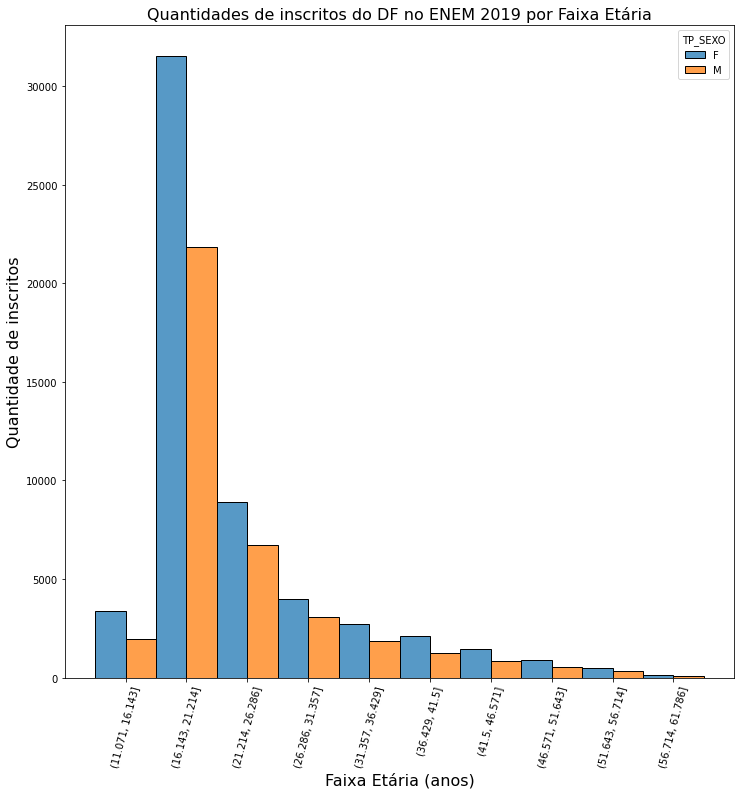

In [16]:
# Vamos utilizar a biblioteca Seaborn para produzir alguns histogramas e avaliar graficamente as informações
# exibidas anteriormente
#
import seaborn as sns

# Tamanho do gráfico
#
plt.figure(figsize=(12,12))

# Gráfico de barras com as faixas etárias e média percentual de quantos empréstimos não foram pagos a tempo.
sns.histplot(data = faixa_etaria_df_1, x = faixa_etaria_df_1['NU_FAIXA_ETARIA'].astype(str), hue=faixa_etaria_df_1['TP_SEXO'], multiple="dodge")

# Configuração dos eixos do gráfico
#
plt.xticks(rotation = 75); plt.xlabel('Faixa Etária (anos)', fontsize=16); plt.ylabel('Quantidade de inscritos', fontsize=16)

# Adicionando título ao gráfico
#
plt.title('Quantidades de inscritos do DF no ENEM 2019 por Faixa Etária', fontsize=16);

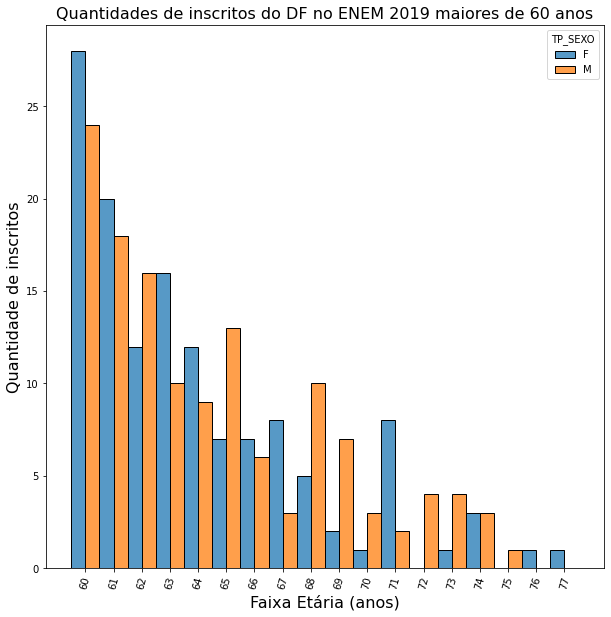

In [17]:
# Ordenando o dataframe com as idades dos incritos de mais de 60 anos por ordem crescente de idade
#
faixa_etaria_df_2 = faixa_etaria_df_2.sort_values(by='NU_IDADE')

# Definindo o tamanho do gráfico
#
plt.figure(figsize=(10,10))

# Gráfico de barras com as faixas etárias e média percentual de quantos empréstimos não foram pagos a tempo.
sns.histplot(data = faixa_etaria_df_2, x = faixa_etaria_df_2['NU_IDADE'].astype(str), hue=faixa_etaria_df_2['TP_SEXO'], multiple="dodge")

# Configuração dos eixos do gráfico
#
plt.xticks(rotation = 75); plt.xlabel('Faixa Etária (anos)', fontsize=16); plt.ylabel('Quantidade de inscritos', fontsize=16)

# Adicionando título ao gráfico
#
plt.title('Quantidades de inscritos do DF no ENEM 2019 maiores de 60 anos', fontsize=16);

* Temos 1 inscrito com 75 anos do sexo masculino e 2 inscritas com 76 e 77 anos de idade, respectivamente, do sexo feminino

### **2.3) Análise da distribuiça de cor/raça dos inscritos**

* Agora que analisamos sexo e idade dos inscritos, vamos observar a cor/raça declara por eles ao se inscreverem no ENEM, para termos uma idéia de como se dá essa distribuição no nosso conjunto de dados

* Essa informação é dada por meio de uma classificação numérica no nosso banco de dados, onde cada número corresponde a uma cor/raça:

**0) Não Declarado**

**1) Branca**

**2) Preta**

**3) Parda**

**4) Amarela**

**5) Indígena**

* Essas informações podem ser encontradas no dicionário dos dados disponbilizados pelo INEP em: https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/DICION%C3%81RIO

In [18]:
# Vamos novamente verificar a distribuição de frequência dos inscritos com a função value_counts()
# Entretanto, para facilitar a análise podemos mapear com um dicionário em Python os valores numéricos
# para seus significados, conforme mostrado abaixo
#
dados_df['TP_COR_RACA'].map({0:'Não declarado', 
                             1:'Branca', 
                             2:'Preta', 
                             3:'Parda', 
                             4:'Amarela', 
                             5:'Indígena'}).value_counts()

Parda            44924
Branca           30268
Preta            13564
Amarela           2625
Não declarado     2534
Indígena           437
Name: TP_COR_RACA, dtype: int64

In [19]:
# Fazemos a mesma análise mas agora com os valores percentuais
#
dados_df['TP_COR_RACA'].map({0:'Não declarado', 
                             1:'Branca', 
                             2:'Preta', 
                             3:'Parda', 
                             4:'Amarela', 
                             5:'Indígena'}).value_counts(normalize=True)*100

Parda            47.613193
Branca           32.079871
Preta            14.375954
Amarela           2.782135
Não declarado     2.685688
Indígena          0.463159
Name: TP_COR_RACA, dtype: float64

* Concluimos que, no nosso conjunto de dados a maioria dos inscritos é de **cor/raça parda, correspondendo a aproximadamente 46.87% do total de inscritos.**

* A cor/raça branca aparece em segundo lugar, com aproximadamente **33.50% do total de inscritos.**

* A cor/raça preta ocupa o terceiro lugar, com aproximadamente **13.94% do total de inscritos.**

* A cor/raça amarela aparece em quarto lugar, com aproximadamente **2.66% do total de inscritos.**

* Um total de **2.61% dos inscritos não informou cor ou raça.**

* **0.41% dos inscritos são de cor/raça indígena.**

Text(0, 0.5, 'Número de inscritos')

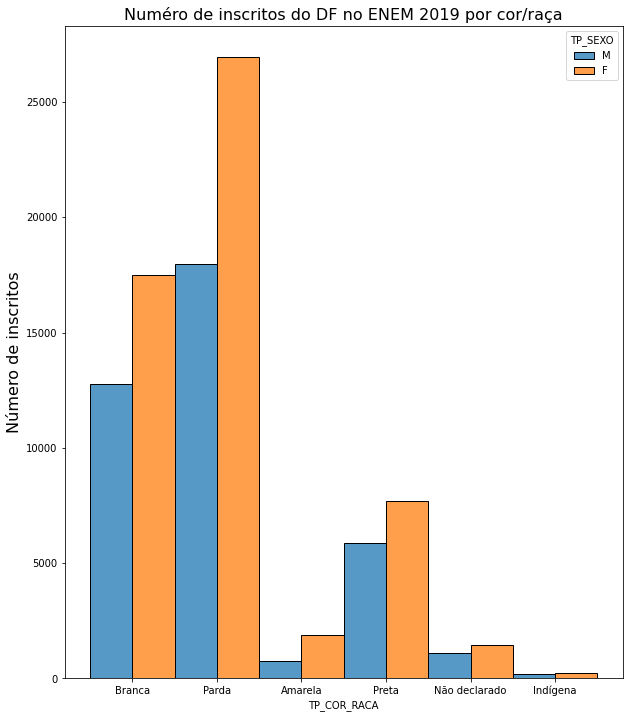

In [20]:
# Tamanho do gráfico
#
plt.figure(figsize=(10,12))

# Plotando histograma do Seaborn. Estamos mais uma vez mapeando os valores numéricos para exibição dos valores no eixo x
#
sns.histplot(data = dados_df, x=dados_df['TP_COR_RACA'].map({0:'Não declarado', 
                                                             1:'Branca', 
                                                             2:'Preta', 
                                                             3:'Parda', 
                                                             4:'Amarela', 
                                                             5:'Indígena'}), hue=dados_df['TP_SEXO'], multiple="dodge")

# Adicionando título
#
plt.title('Numéro de inscritos do DF no ENEM 2019 por cor/raça', fontsize=16)

# Configurando eixos
#
plt.ylabel('Número de inscritos', fontsize=16)

###**2.4) Análise do tipo de escola dos inscritos que concluíram o Ensino Médio**

* Vamos continuar as análises, agora com o item referente ao tipo de escola em que o aluno cursou o Ensino Médio

* Os valores para essa coluna do nosso conjunto de dados também são dados por números:

**1) Não Respondeu**

**2) Escola Pública**

**3) Escola Privada**

**4) Escola no Exterior**

In [21]:
# Utilizando value_counts() e mapeando os valores para exibir a distribuição de frequência
#
dados_df['TP_ESCOLA'].map({1:'Não Respondeu',
                           2:'Pública',
                           3:'Privada',
                           4:'Exterior'}).value_counts()

Não Respondeu    67540
Pública          20294
Privada           6518
Name: TP_ESCOLA, dtype: int64

In [22]:
# Utilizando value_counts() normalizado e mapeando os valores para exibir a distribuição de frequência percentual
#
dados_df['TP_ESCOLA'].map({1:'Não Respondeu',
                           2:'Pública',
                           3:'Privada',
                           4:'Exterior'}).value_counts(normalize=True)*100

Não Respondeu    71.583008
Pública          21.508818
Privada           6.908174
Name: TP_ESCOLA, dtype: float64

* Podemos notar aqui que **a grande maioria dos inscritos (aproximadamente 71.58%) não informou o tipo de escola em que terminou o Ensino Médio.**

* Nessa categoria entram os inscritos mais jovens que não terminaram o Ensino Médio e aqueles que já concluiram, mas que não souberem informar por terem terminado o Ensino Médio há muito tempo. As escolas, muitas vezes, podem não existir mais.

* Ainda é possível notar que **não temos alunos inscritos no DF que cursaram o Ensino Médio no Exterior em 2019.**

* Vamos então fazer uma análise entre aqueles que informaram o tipo de escola em que cursaram o Ensino Médio

In [23]:
# Separando por meio de uma query (consulta) ao conjunto de dados todos os alunos que informaram o tipo de escola
# ('TP_ESCOLA diferente de 1)
#
tipo_de_escola_df = dados_df.query('TP_ESCOLA != 1')

# Analisando a distruibuição de frequência para estes alunos
#
tipo_de_escola_df['TP_ESCOLA'].map({1:'Não Respondeu',
                                    2:'Escola Pública',
                                    3:'Escola Privada',
                                    4:'Exterior'}).value_counts()

Escola Pública    20294
Escola Privada     6518
Name: TP_ESCOLA, dtype: int64

In [24]:
# Analisando distribuição de frequência percentual
#
tipo_de_escola_df['TP_ESCOLA'].map({1:'Não Respondeu',
                                    2:'Escola Pública',
                                    3:'Escola Privada',
                                    4:'Exterior'}).value_counts(normalize=True)*100

Escola Pública    75.68999
Escola Privada    24.31001
Name: TP_ESCOLA, dtype: float64

* Observamos que dentre os que informaram esse tipo de dado na inscrição, **aproximadamente 75.69% dos inscritos concluiram o Ensino Médio em escola pública.**

* Consequentemente, **aproximadamente 24.31% dos inscritos concluiram o Ensino Médio em escolas privadas.**

* Podemos visualizar essas informações no histograma abaixo.

Text(0, 0.5, 'Número de inscritos')

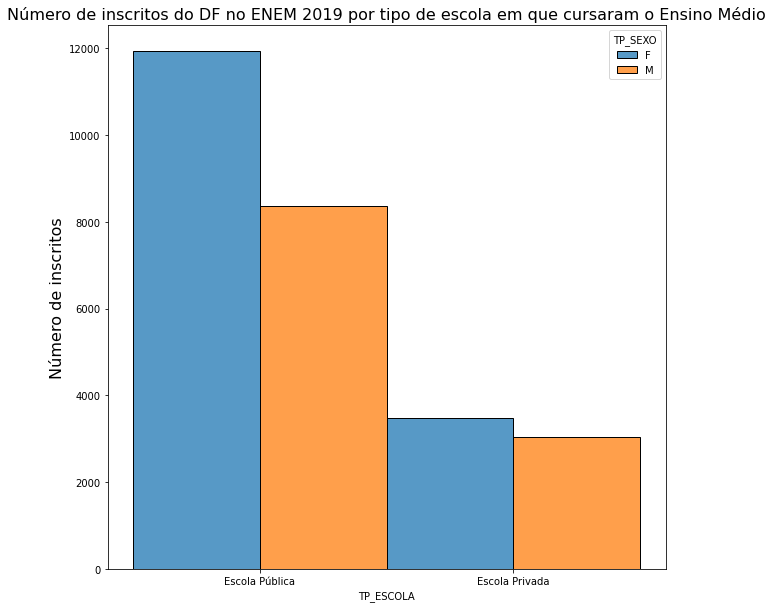

In [25]:
# Tamanho da figura
#
plt.figure(figsize=(10,10))

# Plotando o histograma com Seaborn e mapeando os valores para exibição no eixo x
#
sns.histplot(data = tipo_de_escola_df, x = tipo_de_escola_df['TP_ESCOLA'].map({1:'Não Respondeu',
                                                                               2:'Escola Pública',
                                                                               3:'Escola Privada',
                                                                               4:'Exterior'}), 
             hue=tipo_de_escola_df['TP_SEXO'], multiple="dodge")

# Adicionando título
#
plt.title('Número de inscritos do DF no ENEM 2019 por tipo de escola em que cursaram o Ensino Médio', fontsize=16)

# Configurando os eixos
plt.ylabel('Número de inscritos', fontsize=16)

### **2.5) Análise da renda familiar dos inscritos**

* Nossa próxima análise é feita com base na informação de renda familiar disponibilizada pelos inscritos no ato de inscrição para o ENEM 2019.

* Essa pergunta no questionário de inscrição do ENEM corresponde à questão Q006.

* Temos diversas categorias de renda familiar possíveis:

**A) Nenhuma Renda**

**B) Até R$ 998,00**

**C) De 998,01 até 1497 reais**

**D) De 1497,01 até 1996,00 reais**

**E) De 1996,01 até 2495,00 reais**

**F) De 2495,01 até 2994,00 reais**

**G) De 2994,01 até 3992,00 reais**

**H) De 3992,01 até 4990,00 reais**

**I) De 4990,01 até 5988,00 reais**

**J) De 5998,01 até 6986,00 reais**

**K) De 6986,01 até 7984,00 reais**

**L) De 7984,01 até 8982,00 reais**

**M) De 8982,01 até 9980,00 reais**

**N) De 9980,01 até 11976,00 reais**

**O) De 11976,01 até 14970,00 reais**

**P) De 14970,01 até 19960,00 reais**

**Q) Mais de 19960 reais**

In [26]:
# Mapeando os valores de renda e realizando uma distribuição de frequência dos mesmos
#
dados_df['Q006'].map({'A':'Nenhuma Renda', 'B':'Até R$ 998,00', 'C':'De R$ 998,01 até R$ 1497,00',
                      'D':'De R$ 1497,01 até R$ 1996,00', 'E':'De R$ 1996,01 até R$ 2495,00',
                      'F':'De R$ 2495,01 até R$ 2994,00', 'G':'De R$ 2994,01 até R$ 3992,00',
                      'H':'De R$ 3992,01 até R$ 4990,00', 'I':'De R$ 4990,01 até R$ 5988,00',
                      'J':'De R$ 5998,01 até R$ 6986,00', 'K':'De R$ 6986,01 até R$ 7984,00',
                      'L':'De R$ 7984,01 até R$ 8982,00', 'M':'De R$ 8982,01 até R$ 9980,00',
                      'N':'De R$ 9980,01 até R$ 11976,00', 'O':'De R$ 11976,01 até R$ 14970,00',
                      'P':'De R$ 14970,01 até R$ 19960,00', 'Q':'Mais de R$ 19960,00'}).value_counts()

De R$ 998,01 até R$ 1497,00       23739
Até R$ 998,00                     14291
De R$ 1497,01 até R$ 1996,00       9196
De R$ 1996,01 até R$ 2495,00       8877
De R$ 2994,01 até R$ 3992,00       5237
De R$ 3992,01 até R$ 4990,00       3954
De R$ 2495,01 até R$ 2994,00       3879
Mais de R$ 19960,00                3571
De R$ 4990,01 até R$ 5988,00       3453
De R$ 11976,01 até R$ 14970,00     2669
De R$ 14970,01 até R$ 19960,00     2658
De R$ 9980,01 até R$ 11976,00      2631
Nenhuma Renda                      2492
De R$ 5998,01 até R$ 6986,00       2315
De R$ 6986,01 até R$ 7984,00       1988
De R$ 8982,01 até R$ 9980,00       1723
De R$ 7984,01 até R$ 8982,00       1679
Name: Q006, dtype: int64

In [27]:
# Mapeando os valores de renda e realizando uma distribuição de frequência percentual dos mesmos
#
dados_df['Q006'].map({'A':'Nenhuma Renda', 'B':'Até R$ 998,00', 'C':'De R$ 998,01 até R$ 1497,00',
                      'D':'De R$ 1497,01 até R$ 1996,00', 'E':'De R$ 1996,01 até R$ 2495,00',
                      'F':'De R$ 2495,01 até R$ 2994,00', 'G':'De R$ 2994,01 até R$ 3992,00',
                      'H':'De R$ 3992,01 até R$ 4990,00', 'I':'De R$ 4990,01 até R$ 5988,00',
                      'J':'De R$ 5998,01 até R$ 6986,00', 'K':'De R$ 6986,01 até R$ 7984,00',
                      'L':'De R$ 7984,01 até R$ 8982,00', 'M':'De R$ 8982,01 até R$ 9980,00',
                      'N':'De R$ 9980,01 até R$ 11976,00', 'O':'De R$ 11976,01 até R$ 14970,00',
                      'P':'De R$ 14970,01 até R$ 19960,00', 'Q':'Mais de R$ 19960,00'}).value_counts(normalize=True)*100

De R$ 998,01 até R$ 1497,00       25.160039
Até R$ 998,00                     15.146473
De R$ 1497,01 até R$ 1996,00       9.746481
De R$ 1996,01 até R$ 2495,00       9.408386
De R$ 2994,01 até R$ 3992,00       5.550492
De R$ 3992,01 até R$ 4990,00       4.190690
De R$ 2495,01 até R$ 2994,00       4.111201
Mais de R$ 19960,00                3.784763
De R$ 4990,01 até R$ 5988,00       3.659700
De R$ 11976,01 até R$ 14970,00     2.828769
De R$ 14970,01 até R$ 19960,00     2.817110
De R$ 9980,01 até R$ 11976,00      2.788494
Nenhuma Renda                      2.641173
De R$ 5998,01 até R$ 6986,00       2.453578
De R$ 6986,01 até R$ 7984,00       2.107004
De R$ 8982,01 até R$ 9980,00       1.826140
De R$ 7984,01 até R$ 8982,00       1.779507
Name: Q006, dtype: float64

* Analisando essas informações, temos que **a maioria dos incritos pertence a famílias com renda entre 998,01 e 1497 reais (aproximadamente 25.16%)**

* Em seguida, tem-se **renda familiar de até 998 reais (aproximadamente 15.15%)**, seguido por **renda famliar entre 1497,01 e 1996 reais (9.75%).**

* Inscritos com **renda familiar superior a 19960 reais** ocupam uma colocação relativamente alta, correspondendo a **3.78% dos incritos**. 

* Segundo dados do IBGE de 2019, **o Distrito Federal possui a maior média de renda familiar do país, equivalente a aproximadamente 12,4 mil reais [3].** Isso explicaria o fato de termos uma boa quantidade de inscritos com renda familiar mais alta no Distrito Federal.

* **2.64% dos inscritos declararam que a renda familiar é nula.**

Text(0, 0.5, 'Número de inscritos')

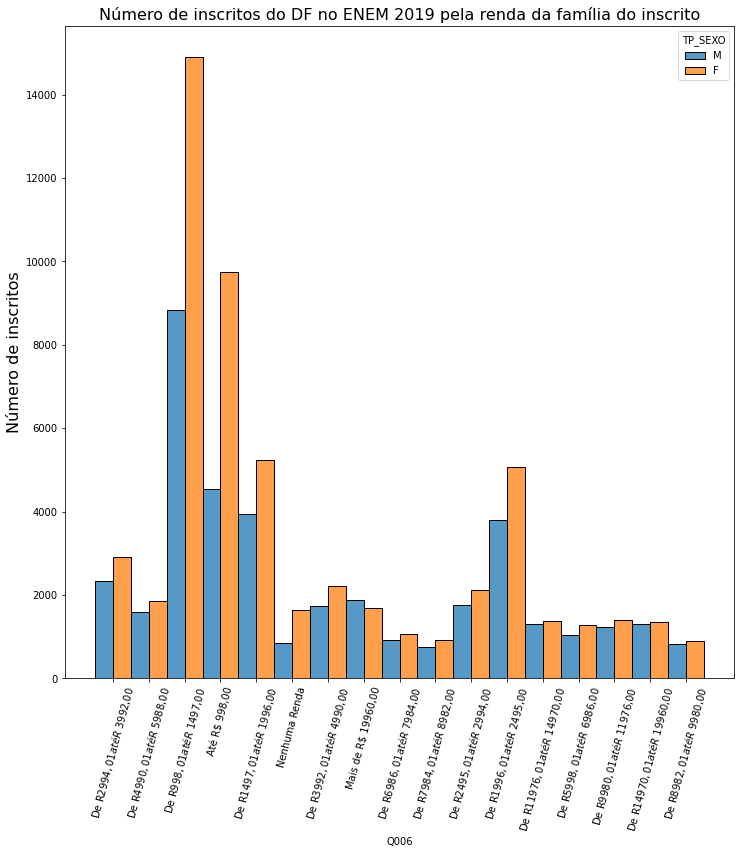

In [28]:
# Tamanho da figura
#
plt.figure(figsize=(12,12))

# Plotando o histograma e mapeando os valores do eixo x para exibição
#
sns.histplot(data=dados_df,x=dados_df['Q006'].map({'A':'Nenhuma Renda', 'B':'Até R$ 998,00', 'C':'De R$ 998,01 até R$ 1497,00',
                      'D':'De R$ 1497,01 até R$ 1996,00', 'E':'De R$ 1996,01 até R$ 2495,00',
                      'F':'De R$ 2495,01 até R$ 2994,00', 'G':'De R$ 2994,01 até R$ 3992,00',
                      'H':'De R$ 3992,01 até R$ 4990,00', 'I':'De R$ 4990,01 até R$ 5988,00',
                      'J':'De R$ 5998,01 até R$ 6986,00', 'K':'De R$ 6986,01 até R$ 7984,00',
                      'L':'De R$ 7984,01 até R$ 8982,00', 'M':'De R$ 8982,01 até R$ 9980,00',
                      'N':'De R$ 9980,01 até R$ 11976,00', 'O':'De R$ 11976,01 até R$ 14970,00',
                      'P':'De R$ 14970,01 até R$ 19960,00', 'Q':'Mais de R$ 19960,00'}), 
                       hue=dados_df['TP_SEXO'], multiple="dodge")

# Adicionando título
#
plt.title('Número de inscritos do DF no ENEM 2019 pela renda da família do inscrito', fontsize=16)

# Configurando os eixos
#
plt.xticks(rotation = 75); plt.ylabel('Número de inscritos', fontsize=16)

###**2.6) Análise da possibilidade de acesso à Internet por parte dos inscritos**

* Agora voltamos nossa atenção para a questão 025 do questionário do inscrição do ENEM, na qual o inscrito declara se tem ou não acesso à internet em seu lar.

* A resposta é dada seguindo a codificação:

**A) Não possui acesso à Internet**

**B) Possui acesso à Internet**

In [29]:
# Para fazer essa análise, separamos a coluna referente à questão 025 do Dataframe dados_df, que é a última
#
internet_df = dados_df.iloc[:,-1:]

# Análise da distribuição de frequência dos incritos com ou sem acesso à Internet
#
internet_df.value_counts()

Q025 
B        80587
A        13765
dtype: int64

In [30]:
# Análise percentual da distribuição de frequência dos incritos com ou sem acesso à Internet
#
internet_df.value_counts(normalize=True)*100

Q025 
B        85.411014
A        14.588986
dtype: float64

<Figure size 864x864 with 0 Axes>

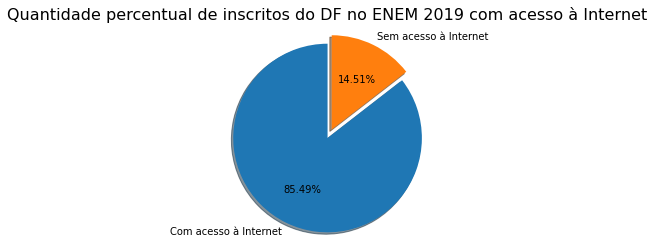

In [31]:
# Usando a função plt.pie() para construir o gráfico de pizza com as informações
# de sexo dos inscritos (dados_df['Q025'])
#
# Definindo o tamanho da figura 
#
plt.figure(figsize=(12,12))

# Labels do gráfico, ordenados no sentido anti-horário:
#
labels = 'Com acesso à Internet', 'Sem acesso à Internet',

# Quantitaivo de cada label (resultado da operação dados_df['TP_SEXO'].value_counts())
#
sizes = [80587,13675]

# Explodir a segunda fatia do gráfico, para criar um pequeno 3D
#
explode = (0, 0.1)  

# Configurando os parâmetros da função
#
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

# Proporção do gráfico como 'equal' garante que o gráfico seja desenhado como um círculo
#
ax1.axis('equal')

# Adicionando título ao gráfico
#
plt.title('Quantidade percentual de inscritos do DF no ENEM 2019 com acesso à Internet', fontsize=16)

# Exibindo o gráfico
#
plt.show()

* Os dados mostram que **85.49% dos inscritos do DF no ENEM 2019 possuem acesso à Internet.**

* O fato de ser a unidade da federação com maior média de renda familiar, conforme visto na subseção anterior, contribui para esse fato.

## **3) Análise das notas do ENEM no DF**

* Conhecendo melhor algumas das características dos inscritos do ENEM, podemos começar a avaliar as notas deles nas provas e procurar relações entre as características analisadas até aqui.

* Para isso, vamos primeiro analisar algumas estatísticas das notas das provas do ENEM, que são divididas em cinco provas distintas:


1. Ciências da Natureza (CN)

2. Ciências Humanas (CH)

3. Linguagens e Códigos (LC)

4. Matemática (MT)

5. Redação

In [32]:
# Vamos selecionar as colunas com as notas de cada prova para os inscritos e armazenar na variável provas
#
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Selecionando somente as notas de cada prova e adicionando a um novo dataframe notas_provas_df
#
notas_provas_df = dados_df[provas]

# Analisando o dataframe notas_provas_df
#
notas_provas_df.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,561.0,576.5,555.9,658.7,700.0
1,585.1,640.1,601.2,689.0,720.0
2,407.5,488.1,552.2,511.0,660.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


* Vemos que em alguns casos, aparece o termo NaN (*Not a Number*), o que indica a ausência de nota para aquela prova.

* Vamos verificar quantos dados assim temos para podermos tratá-los.

In [33]:
# Com a função info() podemos verificar quantas entradas não nulas (diferentes de NaN) temos para cada coluna
#
notas_provas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94352 entries, 0 to 94351
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       66902 non-null  float64
 1   NU_NOTA_CH       71074 non-null  float64
 2   NU_NOTA_LC       71074 non-null  float64
 3   NU_NOTA_MT       66902 non-null  float64
 4   NU_NOTA_REDACAO  71074 non-null  float64
dtypes: float64(5)
memory usage: 3.6 MB


* Vamos verificar a causa dessas entradas nulas:

In [34]:
# Por meio de uma query, separamos a colunas de notas com valores NaN e salvamos no dataframe dados_na_df
#
dados_na_df = dados_df.query('NU_NOTA_CN == "NaN" | NU_NOTA_CH == "NaN" | NU_NOTA_LC == "NaN" | NU_NOTA_MT == "NaN"')

# Colocamos na variável presença as colunas que indicam se o candidato estava presente na prova, se faltou ou se foi 
# eliminado
#
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

# Exibindo a quantidade de alunos com notas nulas
#
print('A quantidade de inscritos que não possuem nota em alguma das provas é de: {}.'.format(dados_na_df.shape[0]))

A quantidade de inscritos que não possuem nota em alguma das provas é de: 27643.


In [35]:
# Verificando a distribuição de frequência dos alunos que possuem notas nulas em pelo menos uma das provas
#
dados_na_df[presenca].value_counts(normalize=True)*100

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0               0               0               0                 83.218175
                1               1               0                 15.678472
1               0               0               1                  0.687335
0               2               2               0                  0.293022
2               1               1               2                  0.112144
1               2               2               1                  0.010853
dtype: float64

* Para os dados acima:

0. Aluno não estava presente
1. Aluno presente
2. Aluno eliminado

* Ou seja, **aproximadamente 83.22% dos alunos com notas nulas em pelo menos uma das provas faltou em ambos os dias de prova.**

* Se somarmos isso ao número de **alunos eliminados em alguma das provas, temos 83.33% dos alunos com notas nulas em pelo menos uma das provas.**

* Por termos uma quantidade expressivas de alunos que não foram fazer a prova, podemos optar por retirar as notas desses alunos do nosso Dataframe ao realizar a análise das notas do ENEM.

In [36]:
# Removendo linhas com valores iguais a NaN do Dataframe com a função dropna()
#
notas_provas_df = notas_provas_df.dropna()

# Verificando que não temos mais entradas nulas no Dataframe
#
notas_provas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66709 entries, 0 to 94351
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       66709 non-null  float64
 1   NU_NOTA_CH       66709 non-null  float64
 2   NU_NOTA_LC       66709 non-null  float64
 3   NU_NOTA_MT       66709 non-null  float64
 4   NU_NOTA_REDACAO  66709 non-null  float64
dtypes: float64(5)
memory usage: 3.1 MB


In [37]:
# Podemos calcular algumas estatísticas referentes às notas de cada prova por parte dos incritos do DF no ENEM 2019
#
notas_provas_df.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,66709.000000,66709.000000,66709.000000,66709.000000,66709.000000
mean,492.901929,526.874065,537.907498,536.908191,595.212640
std,81.282969,83.887244,62.454746,117.182233,175.035914
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,427.700000,468.900000,501.500000,440.700000,520.000000
50%,488.400000,533.000000,544.300000,515.700000,600.000000
75%,553.900000,586.900000,581.900000,619.100000,700.000000
max,802.000000,822.700000,749.600000,985.500000,1000.000000


* A média de cada prova do ENEM 2019 por parte dos inscritos do DF é:

1. Ciências da Natureza: 492.90

2. Ciências Humanas: 526.87

3. Linguagens e Códigos: 537.91

4. Matemática: 536.91

5. Redação: 595.21

* **Tivemos alunos que tiraram 0 nas provas.** Podem ter errado todas as questões que marcaram ou deixado o gabarito em branco.

* Tivemos alunos **atingindo a pontuação máxima na Redação.**

* Tirando a prova de Redação, **a maior nota alcançada em uma das provas doi 985.5 em Matemática.**

* **Matemática também possui o maior desvio padrão.** Isso evidencia que para esta prova, temos a maior diferença entre notas: enquanto alguns alunos vão muito bem, outros alunos se saem bem mau nessa prova.

* **Essa diferença pode ser um indicador sobre a questão da qualidade de ensino de Matemática no DF.**

* **A maior nota em Linguagens e Códigos foi 749.60.** 

* **A maior nota em Ciências Naturais foi 802,** já em **Ciências Humanas foi 822.70.**

## **4) Relacionando dados com as notas do ENEM**

* Agora que entendemos melhor como foram as notas dos alunos do DF inscritos no ENEM 2019 podemos procurar relações das notas com as características estudadas para entender melhor o cenário do DF

In [38]:
# Vamos adicionar ao dataframe dados_df a coluna de faixa etária dos inscritos
#
dados_df['NU_FAIXA_ETARIA'] = faixa_etaria_df['NU_FAIXA_ETARIA']

In [39]:
# Selecionamos algumas colunas que serão nossas variáveis de interesse para essa etapa
#
dados_analise_ENEM = ['NU_IDADE', 'TP_SEXO', 'NU_FAIXA_ETARIA', 'TP_COR_RACA', 'TP_ESCOLA', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Selecionamos somente as colunas com as variáveis de interesse
#
dados_df = dados_df[dados_analise_ENEM]

# Eliminamos linhas com dados nulos
#
dados_df = dados_df.dropna()

# Verificando o dataframe dados_df
#
dados_df.head()

,NU_IDADE,TP_SEXO,NU_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,20,M,"(16.143, 21.214]",1,1,G,561.0,576.5,555.9,658.7,700.0
1,17,F,"(16.143, 21.214]",3,2,I,585.1,640.1,601.2,689.0,720.0
2,22,F,"(21.214, 26.286]",3,1,C,407.5,488.1,552.2,511.0,660.0
7,21,F,"(16.143, 21.214]",3,1,I,525.7,467.5,530.2,462.2,540.0
10,24,F,"(21.214, 26.286]",1,1,B,533.4,587.6,581.2,585.0,720.0


In [40]:
# Quantidade de dados que serão analisados: números de inscritos e características para análise
#
dados_df.shape

(66708, 11)

In [41]:
# Vamos incluir uma coluna com a nota total do aluno para facilitar a análise.
# No caso da nota do ENEM, muitas universidade possuem critérios próprios para calcular a nota do candidato com base
# nas notas que ele obteve em cada caso (média ponderada). Para nossa análise, adotamos uma média simples para verificarmos
# como as características afetam a nota total do candidato
#
dados_df['NU_NOTA_TOTAL'] = (dados_df['NU_NOTA_CN']+dados_df['NU_NOTA_CH']+dados_df['NU_NOTA_LC']+dados_df['NU_NOTA_MT']+dados_df['NU_NOTA_REDACAO'])/5

# Visualizando o dataframe dados_df
#
dados_df.head()

,NU_IDADE,TP_SEXO,NU_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,20,M,"(16.143, 21.214]",1,1,G,561.0,576.5,555.9,658.7,700.0,610.42
1,17,F,"(16.143, 21.214]",3,2,I,585.1,640.1,601.2,689.0,720.0,647.08
2,22,F,"(21.214, 26.286]",3,1,C,407.5,488.1,552.2,511.0,660.0,523.76
7,21,F,"(16.143, 21.214]",3,1,I,525.7,467.5,530.2,462.2,540.0,505.12
10,24,F,"(21.214, 26.286]",1,1,B,533.4,587.6,581.2,585.0,720.0,601.44


###**4.1) Relação entre nota do ENEM e faixa etária**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

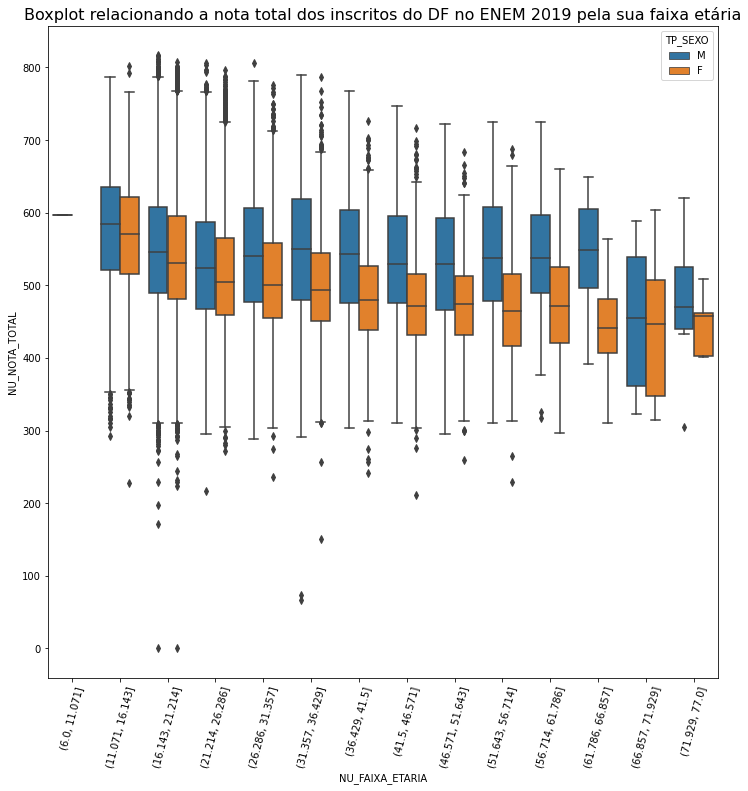

In [42]:
# Tamanho da figura
#
plt.figure(figsize=(12,12))

# Boxplot com a nota total dos inscritos pela sua faixa etária
#
sns.boxplot(x=dados_df['NU_FAIXA_ETARIA'],y=dados_df['NU_NOTA_TOTAL'],data=dados_df,
            hue=dados_df['TP_SEXO'])

# Adicionando título
#
plt.title('Boxplot relacionando a nota total dos inscritos do DF no ENEM 2019 pela sua faixa etária', fontsize=16)

# Ajustando os parâmetros dos eixos
#
plt.xticks(rotation = 75)

* Podemos perceber que, de maneira geral, **as medianas das faixas etárias se mantém próximas.**

* Esses resultados parecem sugerir que **não há uma relação tão grande entre a idade do inscrito do DF e a sua nota no ENEM 2019.**

* O boxplot nos mostra que a mediana de notas é um pouco maior na menor faixa etária (entre 6 e 11 anos). Isso se dá por conta da pouca quantidade de inscritos nessa faixa etária conforme podemos conferir abaixo:

In [43]:
dados_df.query('NU_IDADE >= 6 & NU_IDADE <= 11').value_counts()

NU_IDADE  TP_SEXO  NU_FAIXA_ETARIA  TP_COR_RACA  TP_ESCOLA  Q006  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  NU_NOTA_TOTAL
8         M        (6.0, 11.071]    3            1          J     502.6       589.2       596.4       677.0       620.0            597.04           1
dtype: int64

* De fato, só temos um aluno que se encaixa nesse categoria, então a mediana das notas dessa faixa etária só corresponde à nota dele.

* Havia um aluno com 6 anos na análise, mas ele provavelmente foi retirado do conjunto de dados por conter dados nulos.

###**4.2) Relação entre nota do ENEM e cor/raça**

Text(0.5, 1.0, 'Boxplot relacionando a nota total dos inscritos do DF no ENEM 2019 com sua cor e raça')

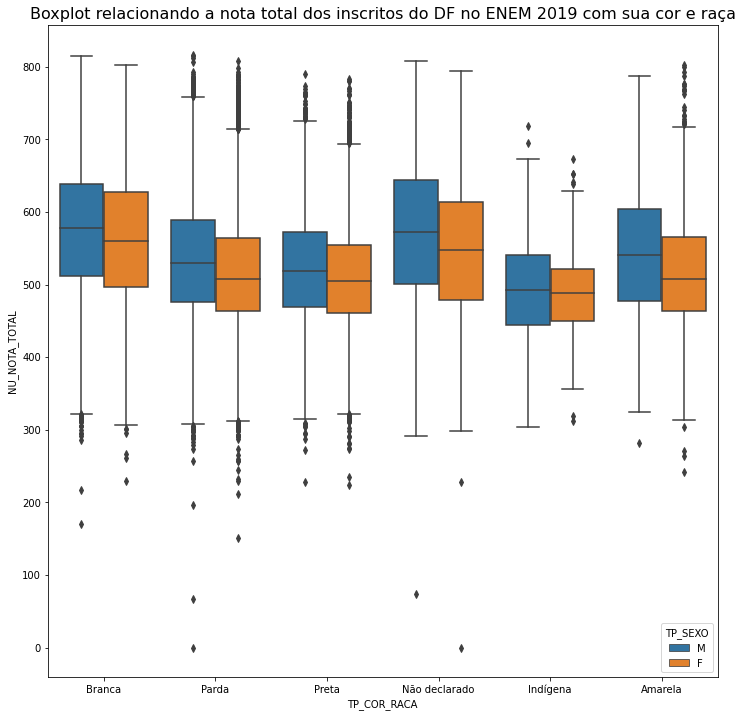

In [44]:
# Tamanho da figura
#
plt.figure(figsize=(12,12))

# Boxplot com a nota total dos inscritos pela sua cor/raça
#
sns.boxplot(x=dados_df['TP_COR_RACA'].map({0:'Não declarado', 
                             1:'Branca', 
                             2:'Preta', 
                             3:'Parda', 
                             4:'Amarela', 
                             5:'Indígena'}), y=dados_df['NU_NOTA_TOTAL'],data=dados_df, hue=dados_df['TP_SEXO'])

# Adicionando título ao gráfico
#
plt.title('Boxplot relacionando a nota total dos inscritos do DF no ENEM 2019 com sua cor e raça', fontsize=16)

* O boxplot nos mostra que há uma tendência dos inscritos de cor/branca tirarem notas totais melhores. 

* Isso se prova não só pela mediana ser mais altas para esta categoria, mas também a quantidade de outliers (pontos mais distantes da distribuição) deixaram de existir nos limites superiores: isso indica que mesmo que a concentração das notas esteja na caixa definida pela boxplot, não é incomum termos notas elevadas para os inscritos de cor branca.

* Esse gráfico evidencia **a desigualdade na edução no Distrito Federal**. Infelizmente, mesmo sendo a maioria da população do DF (57.6% da população), as pessoas negras recebem cerca de 39.4% a menos que pessoas não negras [4].

* Além disso, 63.9% dos negros do DF moram em regiões administrativas de baixa e média renda, de até 3101 reais [4].
* **Essa desigualdade tem impactos na educação do DF e nos resultados do ENEM:** mesmo sendo a maioria da população, a cor/raça preta é somente a 3ª em número total de inscritos conforme vimos na seção 2.3, e possui mediana menor que no caso da cor/raça parda.

* Inscritos de cor/raça indígena são aqueles que alcançaram a menor mediana das notas entre todas as analisadas. Se provavelmente se dá à dificuldade dos mesmos ao acesso à educação e as condições precárias das escolas que atendem as comunidades indígenas não somente no DF, mas no Brasil [5]. 

* Portanto, **parece haver relação entre a cor/raça do inscrito e a sua nota no ENEM.**

### **4.3) Relação entre nota do ENEM e tipo de escola em que terminou o Ensino Médio**

Text(0.5, 1.0, 'Boxplot relacionando nota total dos inscritos do DF no ENEM 2019 com o tipo de escola em que cursaram o Ensino Médio')

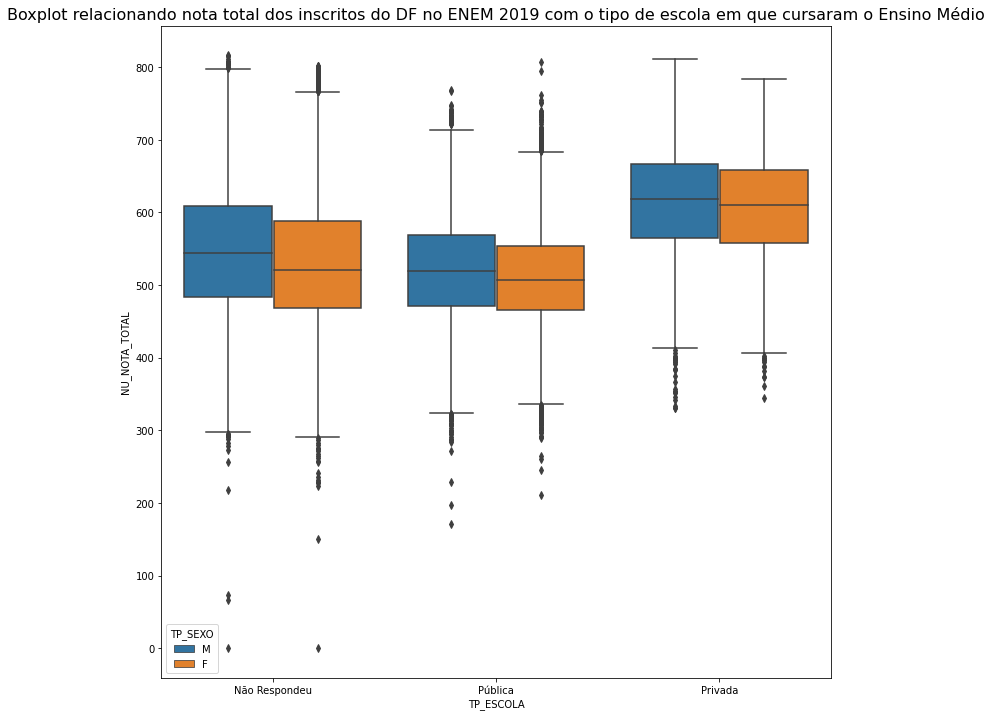

In [45]:
# Tamanho da figura
#
plt.figure(figsize=(12,12))

# Boxplot com a nota total dos inscritos pelo tipo de escola em que terminou o Ensino Médio
#
sns.boxplot(x=dados_df['TP_ESCOLA'].map({1:'Não Respondeu',
                           2:'Pública',
                           3:'Privada',
                           4:'Exterior'}) ,y=dados_df['NU_NOTA_TOTAL'], data=dados_df, hue=dados_df['TP_SEXO'])

# Adicionando o título
#
plt.title('Boxplot relacionando nota total dos inscritos do DF no ENEM 2019 com o tipo de escola em que cursaram o Ensino Médio',
          fontsize=16)

* Temos muitos alunos que não indicaram o tipo de escola. Mais uma vez, muitos podem não ter terminado o Ensino Médio ainda, ou ter concluído há muitos anos atrás, de forma que não souberam informar ou a escola não existe mais.

* Entretanto, dentre os que informam esse dado, o boxplot deixa nítido que há relação entre a nota e o tipo de escola em que se conclui o Ensino Médio no DF.

* **Quem concluiu o Ensino Médio no DF em escola privada possui notas maiores no total do que quem concluiu o Ensino Médio em escola pública.**

* **Isso é evidente não somente pela mediana, mas pelos outliers:** os outliers para conclui o Ensino Médio em escolas privadas são notas inferiores que ainda estão, em sua maioria, na concentração do boxplot de quem conclui o Ensino Médio em escola pública.

* Em outras palavras, **a minoria que tira notas totais no ENEM menores que os demais estudantes da rede privada ainda se sai tão bem quanto a maioria dos alunos da rede pública.**

* **Já para alunos da rede pública, tirar notas mais altas no ENEM** se torna um outlier, ou seja, **não representa a grande maioria dos alunos.** 

* **Isso evidencia mais uma vez a desigualdade no cenário da educação do DF.**

* **Há indícios de relação entre a nota do ENEM e o tipo de escola em que o estudante conclui o Ensino Médio.**



###**4.4) Relação entre nota do ENEM e a renda da família**

In [46]:
# Vamos primeiramente ordenar as classes possíveis da questão Q006 referentes à renda da família do inscrito no ENEM
#
order=dados_df['Q006'].unique()
order.sort()

Text(0.5, 1.0, 'Boxplot relacionando a nota total do inscrito do DF no ENEM 2019 com a renda de sua família')

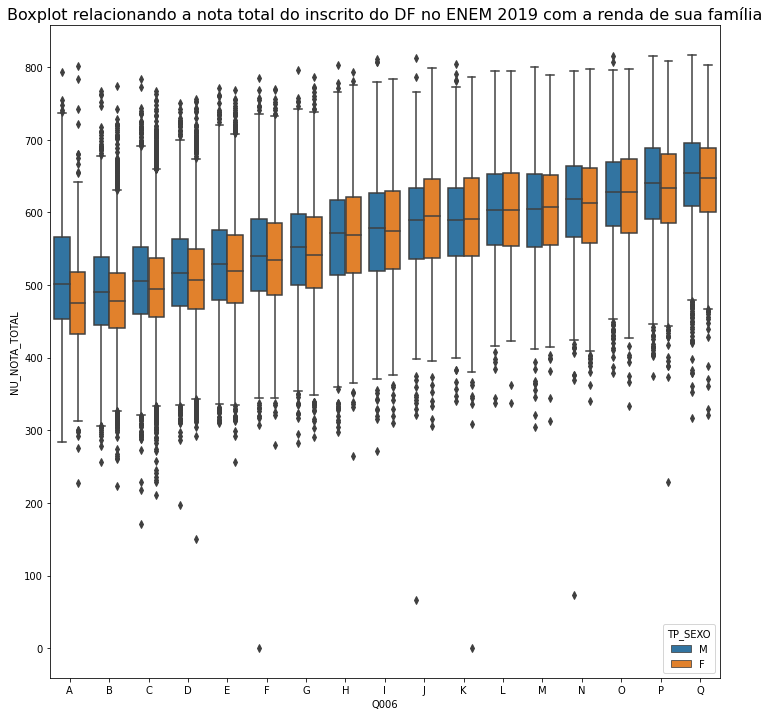

In [47]:
# Tamanho da figura
#
plt.figure(figsize=(12,12))

# Boxplot com a nota total dos inscritos pela renda da sua família
#
sns.boxplot(x=dados_df['Q006'],y=dados_df['NU_NOTA_TOTAL'],data=dados_df, order=order,
            hue=dados_df['TP_SEXO'])

# Adicionando o título
#
plt.title('Boxplot relacionando a nota total do inscrito do DF no ENEM 2019 com a renda de sua família', fontsize=16)

* Lembrando que a classe A seria referente a Nenhuma Renda Familiar e Q a rendas familiares acima de 19960 reais, vemos no boxplot uma clara tendência: **quanto maior a renda da família, maior a nota do inscrito.**

* Apesar de os inscritos cuja renda familiar é nula possuirem uma concentração de notas um pouco melhor do que as classes B e C, por exemplo, **essas três classes compõem as concentrações de notas mais baixas.**

* Ademais, à medida que a classe muda e a renda familiar sobe, a tendência é que a concentração das notas também suba, assim como os outliers superiores passem a não existir, ou seja, **à medida que a renda familiar aumenta, notas mais altas no ENEM se tornam algo mais comum.**

* Mais uma vez, o boxplot **reforça o cenário de desigualdade na educação do DF.**

* O boxplot também sugere **relação entre a renda familiar a nota total do inscrito.**

###**4.5) Correlação entre as variáveis**

* Agora que vimos que entre algumas das variáveis analisadas e a nota total do ENEM parecer haver uma relação, podemos formalizar isso por meio de cálculos de **correlação.**

In [53]:
# Antes dos cálculos de correlação, vamos criar uma coluna que codifica as respostas da questão Q006 (renda familiar)
# que vai de A até Q para números de 0 até 16. Assim, a função de correlação pode estabelecer valores numéricos com
# essa variável.
#
# Mapeando os valores de A até Q para 0 até 16, e salvando em uma nova coluna chamada 'Q006_NUM'
#
dados_df['Q006_NUM'] = dados_df['Q006'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,
                                             'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16})

# Mapeando os valores de 'M' e 'F' para 0 e 1, salvando em uma nova coluna chamada 'TP_SEXO_NUM'
#
dados_df['TP_SEXO_NUM'] = dados_df['TP_SEXO'].map({'M':0, 'F':1})
 
# Verificando os dados do dataframe dados_df
#
dados_df.head()

,NU_IDADE,TP_SEXO,NU_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL,Q006_NUM,TP_SEXO_NUM
0,20,M,"(16.143, 21.214]",1,1,G,561.0,576.5,555.9,658.7,700.0,610.42,6,0
1,17,F,"(16.143, 21.214]",3,2,I,585.1,640.1,601.2,689.0,720.0,647.08,8,1
2,22,F,"(21.214, 26.286]",3,1,C,407.5,488.1,552.2,511.0,660.0,523.76,2,1
7,21,F,"(16.143, 21.214]",3,1,I,525.7,467.5,530.2,462.2,540.0,505.12,8,1
10,24,F,"(21.214, 26.286]",1,1,B,533.4,587.6,581.2,585.0,720.0,601.44,1,1


* Agora podemos começar a estabelecer correlações entre as variáveis de interesse.

* Vamos primeiro dividir as variáveis de interesse em dois grupos, para analisar de forma visual como elas se relacionam.

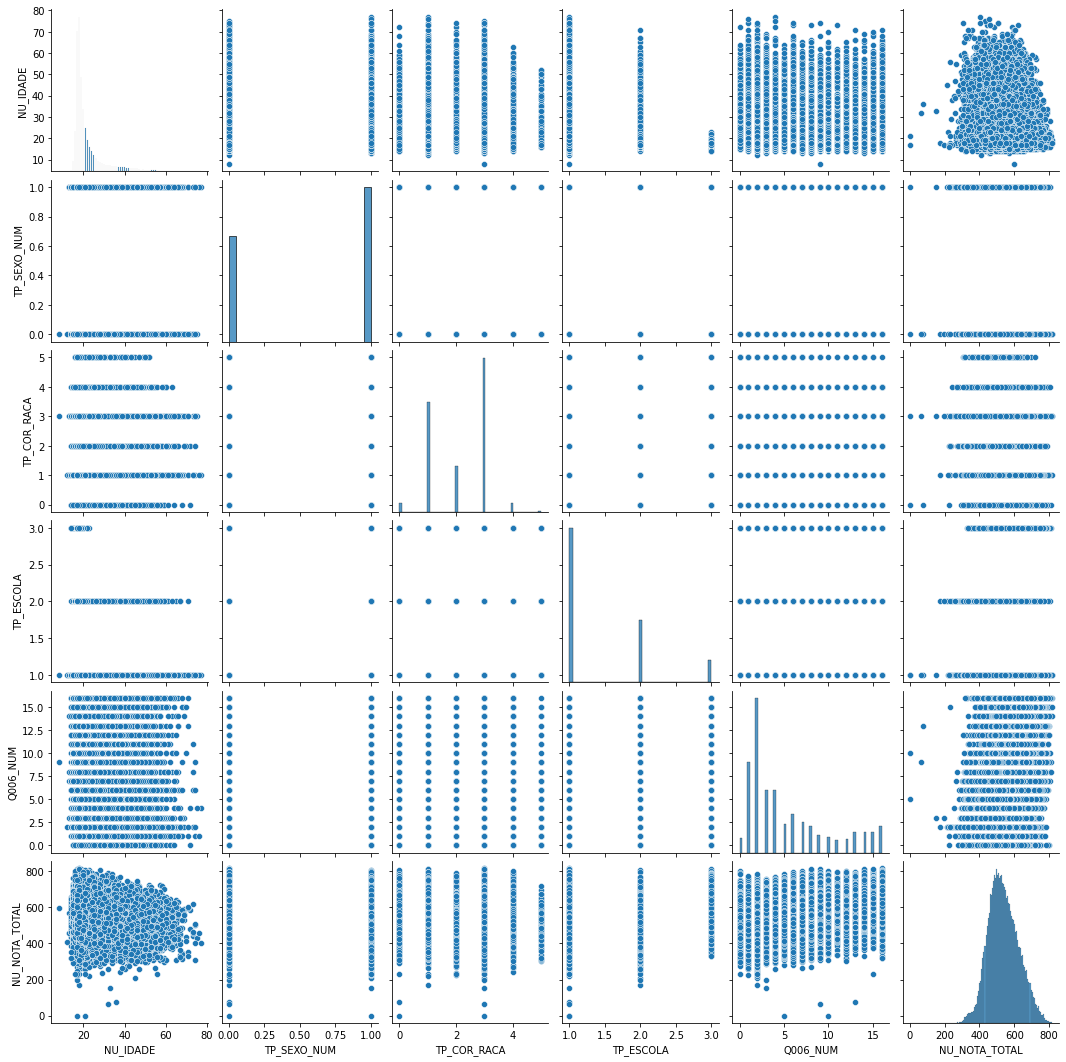

In [57]:
# Primeiro grupo de variáveis de correlação inclui 'NU_IDADE', 'TP_COR_RACA', 'Q006_NUM' e a 'NU_NOTA_TOTAL'
#
analise_corr_1 = ['NU_IDADE', 'TP_SEXO_NUM', 'TP_COR_RACA', 'TP_ESCOLA', 'Q006_NUM', 'NU_NOTA_TOTAL']

#plt.figure(figsize=(16,16))
# Plotando o pairplot: vários gráficos de dispersão que analisam a relação entre todas as variáveis incluindo
# elas mesmas
#
sns.pairplot(dados_df[analise_corr_1])

# Adicionando título
#
#plt.title('Pairplot analisando as relações entre idade, sexo, cor/raça e renda familiar dos inscritos do DF no ENEM 2019', fontsize=16)

* O gráfico acima mostra relações entre as distribuição das variáveis com as demais e consigo mesma.

* De maneira geral, cada tipo de distribuição apresenta um comportamento diferente. 

* Como muitos deles são linhas (horizontais ou verticais), parece haver uma certa concentração em valores específicos. Isso acontece porque muitas dessas categorias apresentam valores fixos (como sexo, cor/raça e 'Q006_NUM'), o que faz com que as distribuições assumam esse formato mais linear.

* A nota notal, por exemplo, que apresenta muitos valores numéricos diferentes, sempre gera gráficos mais dispersos, mas podemos notar que ele é bem concentrado nas categorias, o que parece confirmar visualmente que temos sim relação entre as variáveis.

* No caso de idade, o gráfico é mais disperso, o que indica uma relação menor. Nos boxplots, vimos que por faixa etária a concentração dos resultados nas provas era bem parecida e o gráfico comprova isso.

* Os gráficos na diagonal principal da imagem, são as distribuições da variável em relação a ela mesma.



* Vamos calcular então a **correlação** entre essas variáveis e analisar o **mapa de calor** dessa correlação.

In [58]:
# Cálculo da matriz de correlação entre as variáveis analisadas até o momento
#
correlacao_1 = dados_df[analise_corr_1].corr()
correlacao_1

,NU_IDADE,TP_SEXO_NUM,TP_COR_RACA,TP_ESCOLA,Q006_NUM,NU_NOTA_TOTAL
NU_IDADE,1.000000,0.007853,0.047297,-0.350079,-0.139041,-0.178116
TP_SEXO_NUM,0.007853,1.000000,0.027765,-0.037614,-0.093569,-0.088262
TP_COR_RACA,0.047297,0.027765,1.000000,-0.071275,-0.254309,-0.216161
TP_ESCOLA,-0.350079,-0.037614,-0.071275,1.000000,0.188668,0.124103
Q006_NUM,-0.139041,-0.093569,-0.254309,0.188668,1.000000,0.558575
NU_NOTA_TOTAL,-0.178116,-0.088262,-0.216161,0.124103,0.558575,1.000000


* A matriz de correlação traz um valor numérico que vai de -1 a 1 indicando a relação entre cada variável.

* **O valor 1 indicaria uma correlação máxima diretamente proporcional:** quando uma variável aumenta, a outra aumenta proporcionalmente.

* Na diagonal principal, por exemplo, os valores são sempre 1, pois a relação de uma variável com ela mesma é sempre máxima e igual a 1.

* **O valor -1 indicaria uma correlação máxima inversamente proporcional:** quando uma variável aumenta, a outra diminui proporcionalmente.

* **O valor 0 indicaria correlação nula entre as variáveis:** uma não tem relação com a outra.

* Ou seja, **quanto mais perto de zero, menor a relação entre as variáveis. Quanto mais próximo de 1 ou -1, maior a relação:** se for positiva é uma relação diretamente proporcional, se for negativa é inversamente proporcional.

* Com isso, podemos ver pela última coluna da tabela a **correlação de cada variável com a nota total do inscrito no ENEM.**

* A idade possui correlação negativa (aproximadamente -0.18): isso indica que **à medida que a idade dos inscritos diminui, a nota total tende a aumentar.** 

* Isso faz sentido com os boxplots vistos anteriormente, mas a concentração das notas não mudava muito, o que explica o fato de o módulo da correlação ser menor do que da maioria das variáveis. 

* Ou seja, **há relação entre a idade e a nota final, mas não é uma relação tão forte assim.**

* Da mesma forma, **a relação entre sexo do inscrito e nota final do ENEM é bem pequena (-0.09 aproximadamente).**

* Há uma pequena tendência da média das notas aumentar quando o valor numérico do sexo diminui. Isso indicaria uma **média de nota maior para o sexo masculino** (codificado como '0') quando comparado ao sexo feminino (codificado como '1').

* Isso é interessante do ponto de vista de que **a maioria dos incritos é do sexo feminino,** mas o módulo da correlação é o mais próximo de 0 das variáveis analisadas. Mesmo que haja essa tendência, **a relação é bem pequena.**

* Com essa informação e analisando os boxplots das seções 4.1 a 4.4 (nos quais as medianas entre sexo masculino e feminino alternavam entre qual era maior), podemos considerar que **não há relação significativa entre o sexo do inscrito e sua nota final.**

* **A correlação entre cor/raça e a nota total também é negativa (aproximadamente -0.22).**

* **Como o valor 0 indica cor/raça não especificada, isso contribui para tornar o módulo da correlação mais próxima de 0.**

* Mesmo assim, **quanto menor o valor atribuído à cor/raça, maior a nota no ENEM.** Evidenciamos isso no boxplot, onde as melhores notas concentravam-se na cor/raça branca, cujo valor numérico no questionário é 1.

* Ou seja, à medida que o valor numérico numérico sobe, vamos tendo uma tendência de queda nas notas do ENEM, o que comprova mais uma vez o cenário de que **a cor/raça influencia na nota total do ENEM.**

* **Isso obviamente não ocorre por conta da cor/raça em si, mas por conta de outros fatores** que podemos analisar na tabela de correlação. **A relação entre renda familiar e a cor/raça do inscrito também possui valor numérico negativo** e um pouco maior em módulo do que a correlação entre cor/raça e a nota final.

* Em outras palavras, **há uma relação entre cor/raça e a renda familiar, de forma que a renda familiar dos inscritos de cor/raça branca tende a ser maior. A renda familiar impacta no acesso do inscrito a um ensino de qualidade e, consequentemente, em como ele pode se preparar para o ENEM.** 

* **A correlação entre o tipo de escola (0.12) fica mais próxima de zero por conta de a grande maioria não ter indicado o tipo de escola em que terminou o Ensino Médio** (resposta igual a 0 no questionário).

* Mesmo assim, **a correlação é positiva: a nota aumenta quando o valor numérico associada ao tipo de escola aumenta.**

* Sabendo que o valor maior encontrado nos dados é igual a 3, referente às escolas privadas, isso mostra que há relação entre o tipo de escola e a nota do inscrito: **a tendência dos alunos da rede privada é de obter melhores resultados do que os da rede pública.**

* Por fim, **temos a renda familiar sendo a variável mais fortemente correlacionada com a nota dos inscritos (aproximadamente 0.56).**

* Esta é mais uma evidência de que **à medida que a renda familiar sobe** (pois a classe de menor renda é A com valor numérico mapeado para 0, e a classe de maior renda é Q, com valor numérico mapeado para 16), **a nota do inscrito também aumenta, com uma relação mais forte do que nas demais variáveis.**

* A tabela mostra também que **a relação da renda familiar com a cor/raça** (como já destacamos) **e o tipo de escola existe,** apesar de ser menor do que com a nota total do ENEM. **Maior renda familiar tende a indicar que o inscrito vem da rede privada.**
 
* Esses resultados reforçam o que já haviamos visto em outras seções, analisando os boxplots: **a desigualdade no cenário educacional do DF.** 

* Podemos ver essas informações numéricas no mapa de calor abaixo:

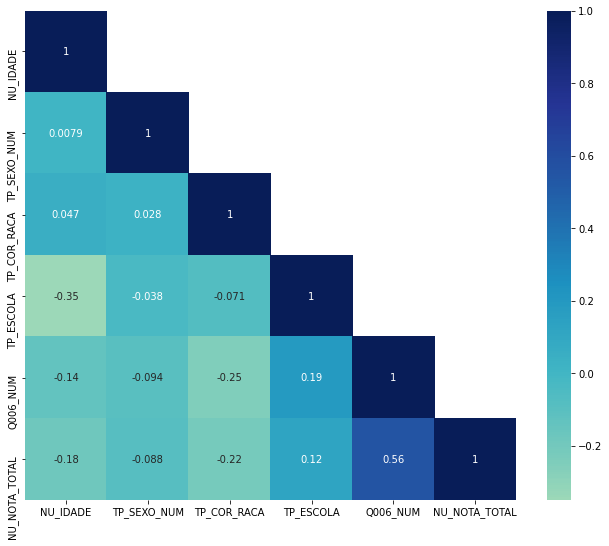

In [59]:
# Gerando a máscara que seleciona a diagonal superior da matriz de correlação.
# O parâmetro k=1 não inclui a diagonal principal; k=0 coloca a diagonal principal
# na máscara (tira a diagonal do mapa de calor)
#
mask = np.triu(np.ones_like(correlacao_1, dtype=bool), k=1)

# Tamanho da figura
#
f, ax = plt.subplots(figsize=(11, 9))

# Gerando uma paleta divergente de cores para o mapa de calor
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenhando o mapa de calor aplicando a máscara que elimina a diagonal superior
#
sns.heatmap(correlacao_1, mask=mask, cmap="YlGnBu", center=0,
            annot=True)

* **Quanto mais escuro o tom de azul do mapa de calor, maior a correlação entre as variáveis.**

* Novamente, correlações iguais a 1 são os resultados da correlação das variáveis com elas mesmas.

* Tirando esses pontos, os tons mais escuros de azul são encontrados na **relação entre renda familiar e nota total, que estão fortemente relacionados.**

* **Tons mais próximos do verde claro indiciam correlações mais fortes em módulo, mas que são negativas.**

* Há uma correlação negativa forte entre escola e idade, mas isso só comprova que a medida que a idade diminui, o candidato cai na categoria de tipo de escola igual a 0, que é não declarado. Candidatos mais jovens não terminaram o Ensino Médio e isso faz sentido.

* Tirando esse ponto, **a correlação negativa mais forte é entre renda familiar e cor/raça, seguida por cor/raça e nota total da prova.**

* Assim, graficamente evidenciamos os pontos já discutidos anteriormente: **a renda familiar dos inscritos da cor/raça branca é maior e isso favorece diretamente a qualidade do ensino dos mesmos, resultando em notas maiores no ENEM.**

##**5) Conclusões**

* Após as análises realizadas sobre os dados da educação do Distrito Federal, vimos que **o cenário educacional do DF é bastante desigual.**

* Os dados mostram que pessoas de cor/raça branca , de maneira geral, **possuem maior renda familiar que as demais. Isso por si só demonstra uma desigualdade de âmbito social no DF, que sabemos que infelizmente se repete no cenário nacional: a disparidade de renda entre brancos e negros, por exemplo, tem aumentado nos últimos 5 anos** [5].

* Os dados também mostram que **a renda familiar está fortemente ligada com a nota dos alunos: quanto maior a renda familiar, maior a nota no ENEM.**

* Isso porque **a renda familiar impacta no tipo de escola em que se conclui o Ensino Médio e no tipo de acesso à educação e preparo que o inscrito possui para o ENEM.**

* **O objetivo aqui não é estabelecer que essa análise é precisa e indica todos os problemas do cenário educacional do DF.** Muitas outras análises podem ser feitas nesse conjunto de dados e para se ter uma idéia mais geral de como a situação tem evoluído, podemos utilizar dados dos inscritos do ENEM de anos anteriores.

* Entretanto, os resultados nos mostram que precisamos estar alertas à situação educacional do DF e que algo precisa ser feito: **o resultado do ENEM é para muitos a porta de entrada em uma universidade e fica claro que pessoas com pouca renda familiar tem menos chances de concorrer a essas vagas.**

* **O ensino e a educação são transformadores e capazes de melhorar a qualidade de vida da população.** O fato de pessoas de baixa renda não terem acesso à educação de qualidade torna a situação delas mais complicada e diminui a chance de melhorar a qualidade de vida e a renda familiar propriamente dita.

* Isso cria um ciclo que resulta no cenário desigual que temos hoje: **quem tem renda familiar mais alta tem bastante vantagem no ENEM, o que contribui para que o cenário da educação no DF se mantenha desigual.**

## **Agradecimentos**

* Gostaria de agradecer à equipe da Alura por terem organizado um evento tão interessante como foi a 2ª Imersão de Dados. Parabéns a toda a equipe.

* Além disso, tive várias idéias e dúvidas sanadas com a comunidade exclusiva do Discord. Mesmo não interagindo tanto, por questões de tempo, foi muito proveitoso observar as dúvidas e resultados divididos pela comunidade.

##**Referências bibliográficas**

[1] **SEDF,** *Censo Escolar do DF 2019*, 2019. Disponível em: http://www.educacao.df.gov.br/censo-escolar-2019/

[2] **Machado, M.** *52,2% dos moradores do DF são mulheres, segundo a Codeplan*, 2019. Disponível em: https://www.correiobraziliense.com.br/app/noticia/especiais/aniversariodebrasilia2019/2019/04/21/noticia-aniversariobrasilia-2019,750334/52-2-dos-moradores-do-df-sao-mulheres-segundo-a-codeplan.shtml

[3]  **Alves, P.** *Famílias do DF possuem rendimento médio de R$ 12,4 mil por mês, aponta IBGE*,2019. Disponível em: https://g1.globo.com/df/distrito-federal/noticia/2019/10/05/familias-do-df-possuem-rendimento-medio-de-r-124-mil-por-mes-aponta-ibge.ghtml.

[4] **Agência Brasília** *63,9% dos negros do DF moram em RA de média e baixa renda*, 2019. Disponível em: https://www.agenciabrasilia.df.gov.br/2019/11/20/639-dos-negros-do-df-moram-em-ra-de-media-e-baixa-renda/

[5] **Laporta, T.** *Disparidade de renda cresceu entre brancos e negros em 5 anos, mas caiu entre homens e mulheres*, 2019. Disponível em: https://g1.globo.com/economia/noticia/2019/04/19/disparidade-de-renda-cresceu-entre-brancos-e-negros-em-5-anos-mas-caiu-entre-homens-e-mulheres.ghtml